## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

### Loading Data Set

In [7]:
data_path = "spambase.data"
data = np.loadtxt(data_path, dtype=float, delimiter=',')

X = data[:, :-1]
Y = data[:, -1]

print(X.shape)
print(Y.shape)

print(Y.sum()/Y.shape[0])

# Split the data into training and test sets
kf = KFold(n_splits=5, shuffle=True)

(4601, 57)
(4601,)
0.39404477287546186


## LDA Evaluation

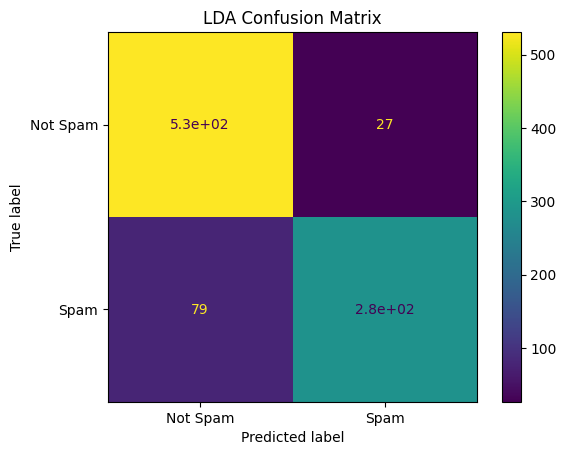

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

confusion = []

for train_index, test_index in kf.split(X):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X[train_index], Y[train_index])
    predictions = lda.predict(X[test_index])
    cm = confusion_matrix(Y[test_index], predictions, labels=[0, 1])
    confusion.append(cm)

average_confusion = np.mean(confusion, axis=0)

disp = ConfusionMatrixDisplay(average_confusion, display_labels=["Not Spam", "Spam"])

disp.plot()
disp.ax_.set_title("LDA Confusion Matrix")
plt.show()




## QDA Evaluation

/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


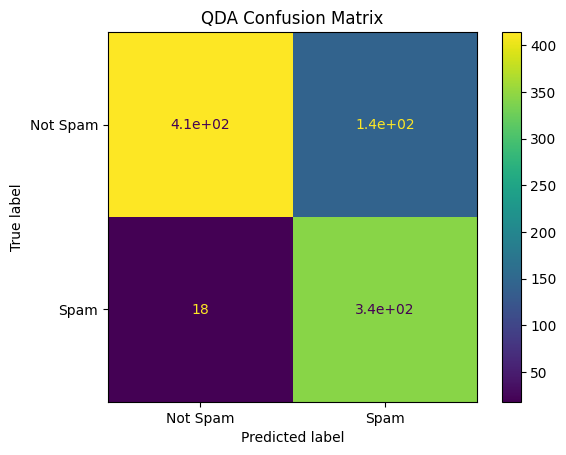

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

confusion = []

for train_index, test_index in kf.split(X):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X[train_index], Y[train_index])
    predictions = qda.predict(X[test_index])
    cm = confusion_matrix(Y[test_index], predictions, labels=[0, 1])
    confusion.append(cm)

average_confusion = np.mean(confusion, axis=0)

disp = ConfusionMatrixDisplay(average_confusion, display_labels=["Not Spam", "Spam"])

disp.plot()
disp.ax_.set_title("QDA Confusion Matrix")
plt.show()

## Logistic Regression Evaluation

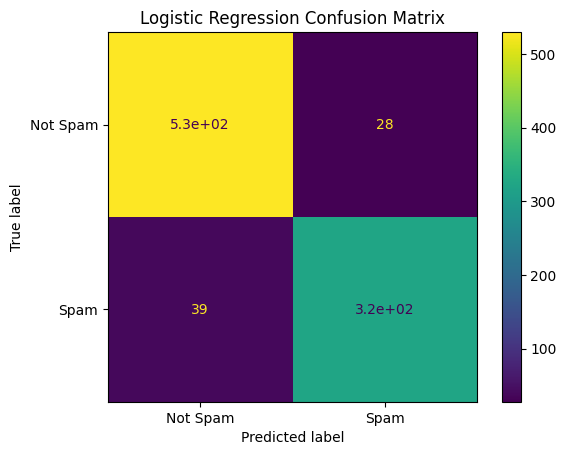

In [10]:
from sklearn.linear_model import LogisticRegression

confusion = []

for train_index, test_index in kf.split(X):
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X[train_index], Y[train_index])
    predictions = lr.predict(X[test_index])
    cm = confusion_matrix(Y[test_index], predictions, labels=[0, 1])
    confusion.append(cm)

average_confusion = np.mean(confusion, axis=0)

disp = ConfusionMatrixDisplay(average_confusion, display_labels=["Not Spam", "Spam"])

disp.plot()
disp.ax_.set_title("Logistic Regression Confusion Matrix")
plt.show()

## Naive Bayes Evaluation

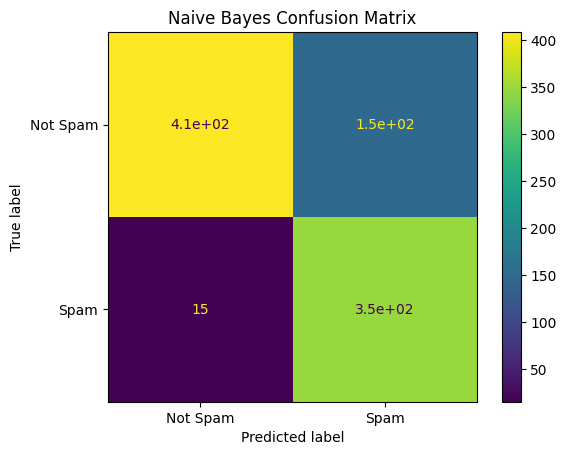

In [11]:
from sklearn.naive_bayes import GaussianNB

confusion = []

for train_index, test_index in kf.split(X):
    nb = GaussianNB()
    nb.fit(X[train_index], Y[train_index])
    predictions = nb.predict(X[test_index])
    cm = confusion_matrix(Y[test_index], predictions, labels=[0, 1])
    confusion.append(cm)

average_confusion = np.mean(confusion, axis=0)

disp = ConfusionMatrixDisplay(average_confusion, display_labels=["Not Spam", "Spam"])

disp.plot()
disp.ax_.set_title("Naive Bayes Confusion Matrix")
plt.show()